In [1]:
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [2]:
import pickle

results_dicts = dict()
for dataset_name in ['agnews', 'financial_phrasebank', 'glue_sst2', 'rotten_tomatoes', 'sst5', 'subjective', 'trec', 'tweet_eval_emotion', 'tweet_eval_hate']:
    file_path = f"results/results_k_[4]_seeds_5_datasets_['{dataset_name}']_models_['Llama'].pkl"
    with open(file_path,'rb') as f:
        results_dicts[dataset_name] = pickle.load(f)

In [3]:
def generate_plot(results_dicts, dataset_name, methods_to_compare, metrics):
    outcomes = results_dicts[dataset_name]['Llama']['results_dic']
    outcomes = outcomes[list(outcomes.keys())[0]]

    methods_perms = dict()
    for method in methods_to_compare:
        methods_perms[method] = []

    for seed in outcomes:
        outcome = outcomes[seed]['4']
        for m in outcome:
            if m in methods_to_compare:
                methods_perms[m].append(outcome[m])

    plt.figure(figsize=(20,20))
    for i, metric in enumerate(metrics):
    
        values_to_plot = []
        for method in methods_to_compare:
            values_to_plot.append(np.mean(np.array([d[metric] for d in methods_perms[method]])))
        plt.subplot(int(f'41{i+1}'))
        plt.scatter(methods_to_compare, values_to_plot)
        plt.title(metric)

In [4]:
methods_to_compare = ['Baseline', 'CC', 'Domain', 'Batch', 'LR-average_voting',\
                      'LR-0','LR-1-average_voting','LR-2-average_voting','LR-3-average_voting']
metrics = ['accuracy','averaged_truelabel_likelihood','macro_F1','expected_calibration_error_1']

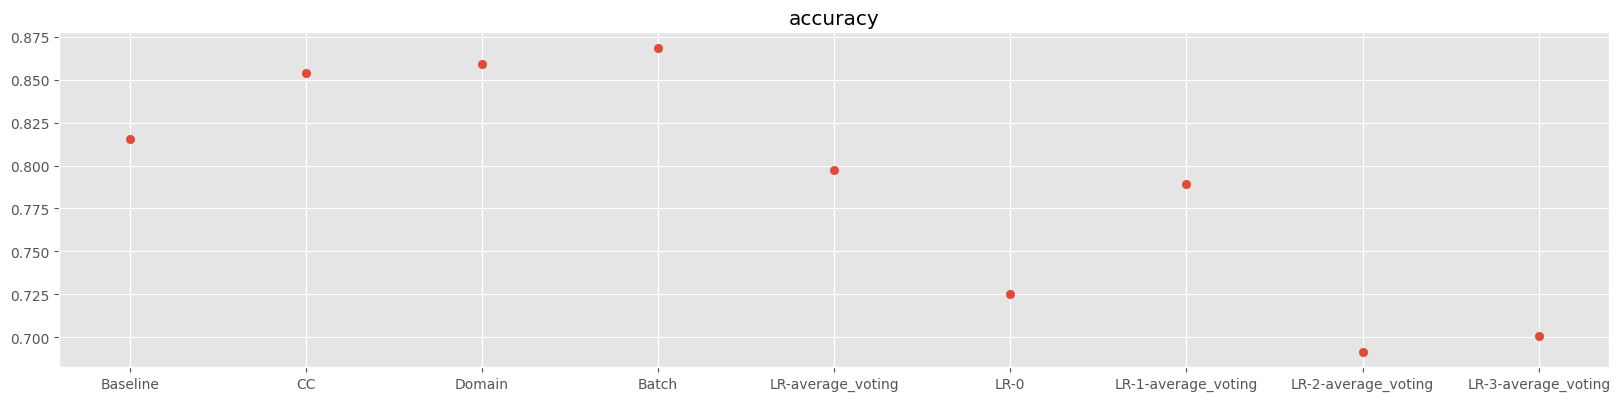

In [5]:
generate_plot(results_dicts, 'financial_phrasebank', methods_to_compare, ['accuracy'])

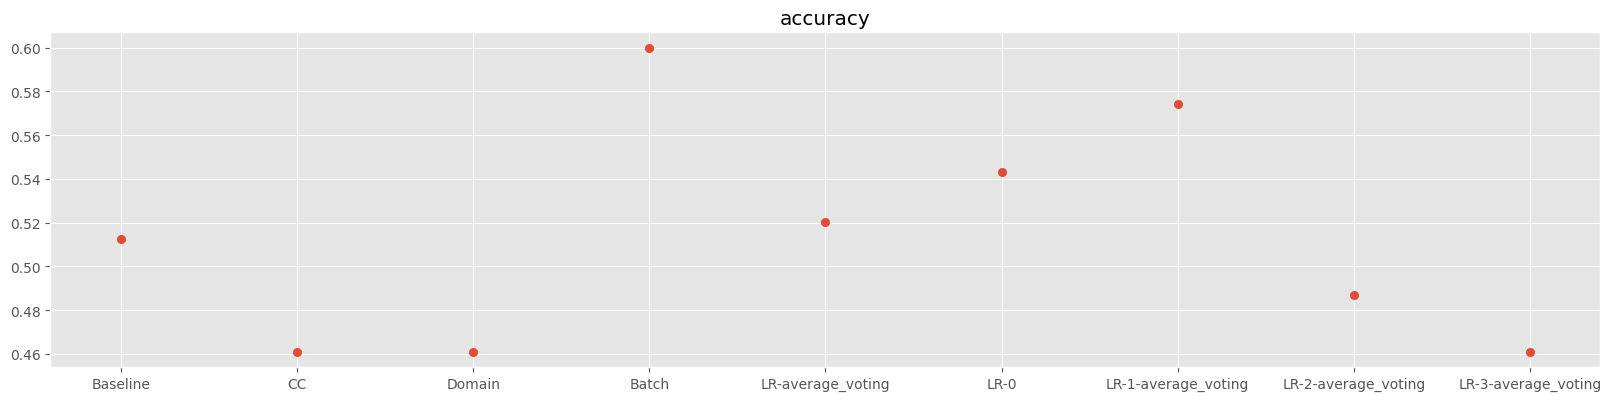

In [6]:
generate_plot(results_dicts, 'subjective', methods_to_compare, ['accuracy'])

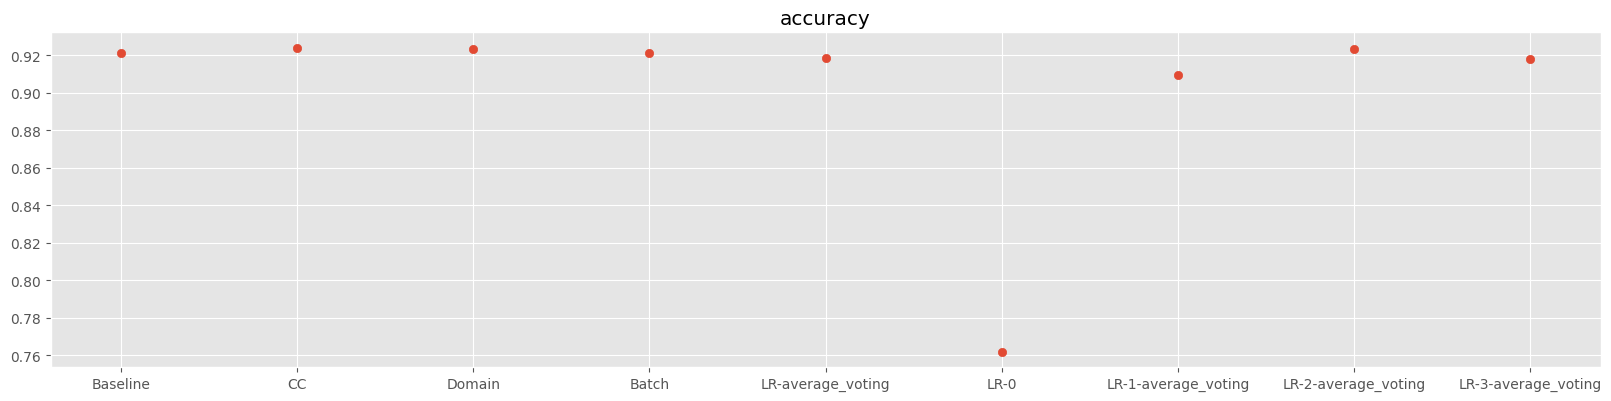

In [7]:
generate_plot(results_dicts, 'rotten_tomatoes', methods_to_compare, ['accuracy'])

## Legacy Plots

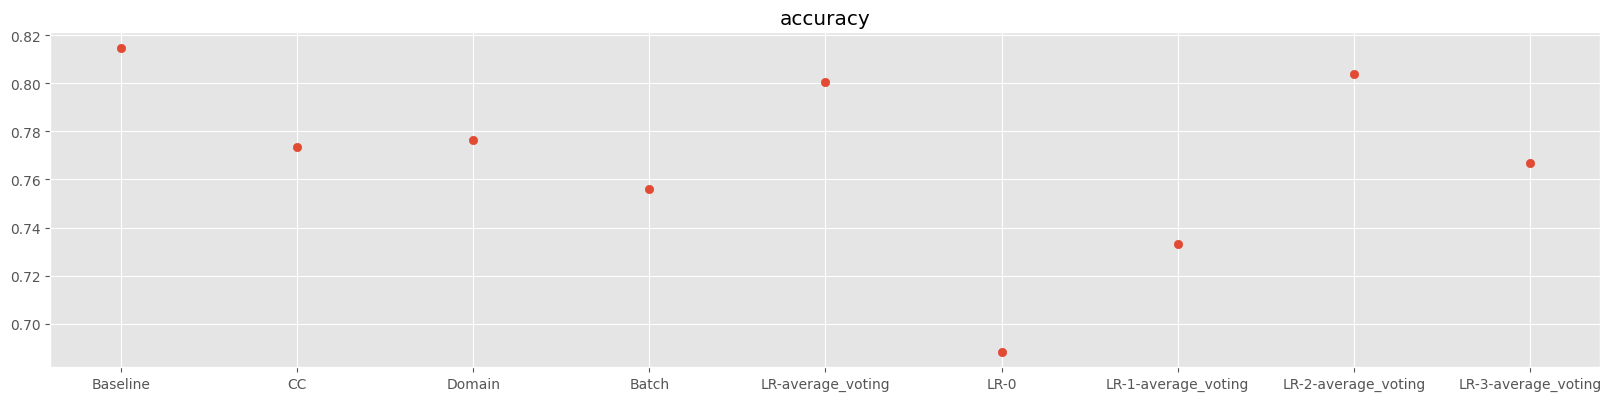

In [64]:
generate_plot(results_dicts, 'agnews', methods_to_compare, ['accuracy'])

In [70]:
outcomes = results_dicts['financial_phrasebank']['Llama']
outcomes['coefficients_dic']

{'financial_phrasebank': {'seed_2206632489': {},
  'seed_2481609806': {},
  'seed_24520513': {},
  'seed_1825229417': {},
  'seed_2411013676': {}}}

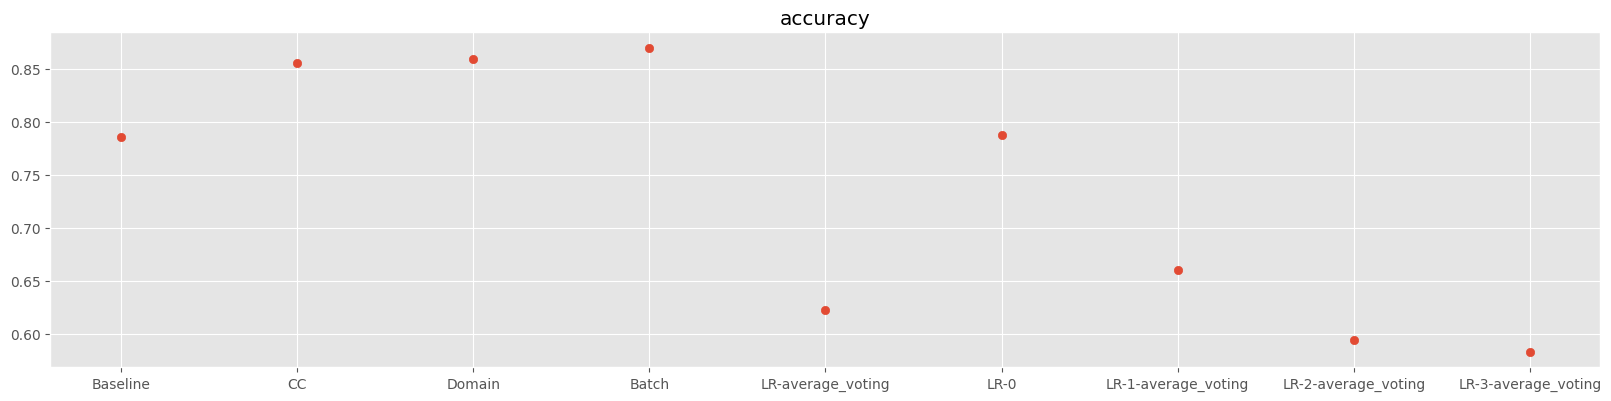

In [65]:
generate_plot(results_dicts, 'financial_phrasebank', methods_to_compare, ['accuracy'])

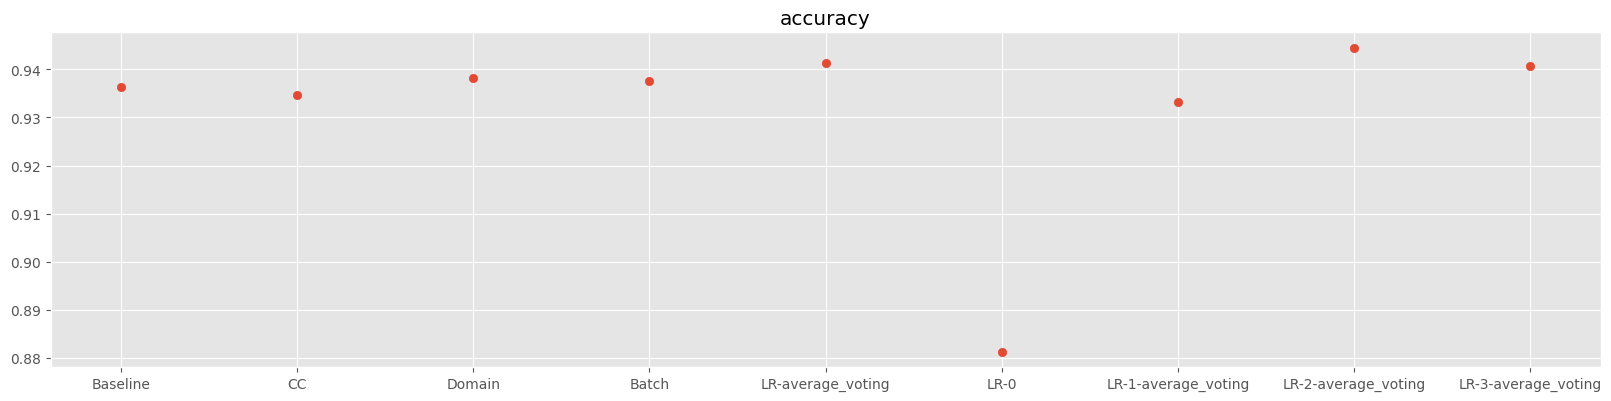

In [66]:
generate_plot(results_dicts, 'glue_sst2', methods_to_compare, ['accuracy'])

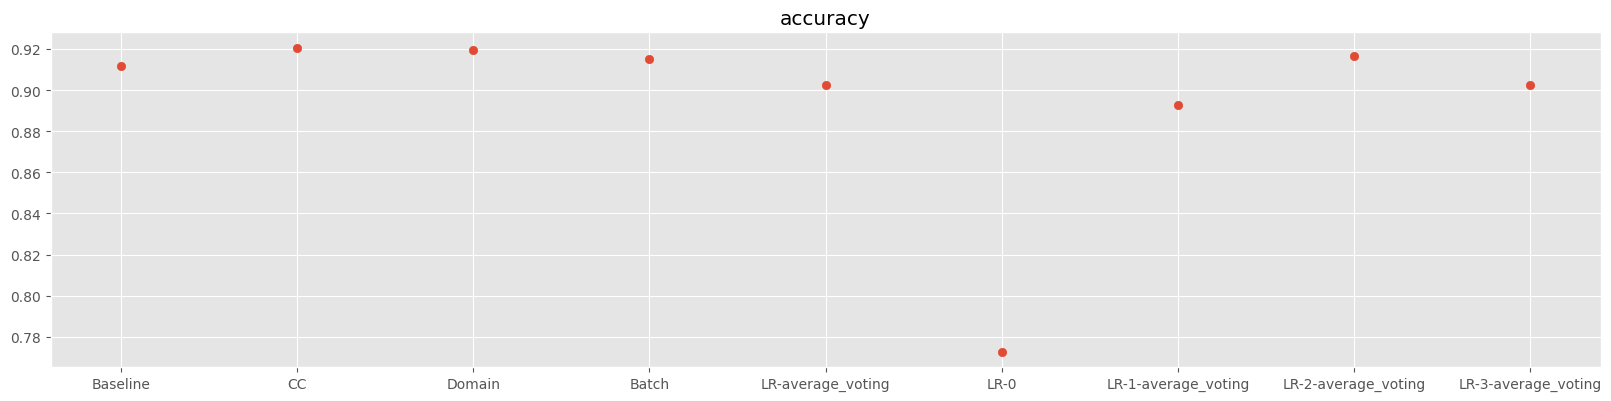

In [67]:
generate_plot(results_dicts, 'rotten_tomatoes', methods_to_compare, ['accuracy'])

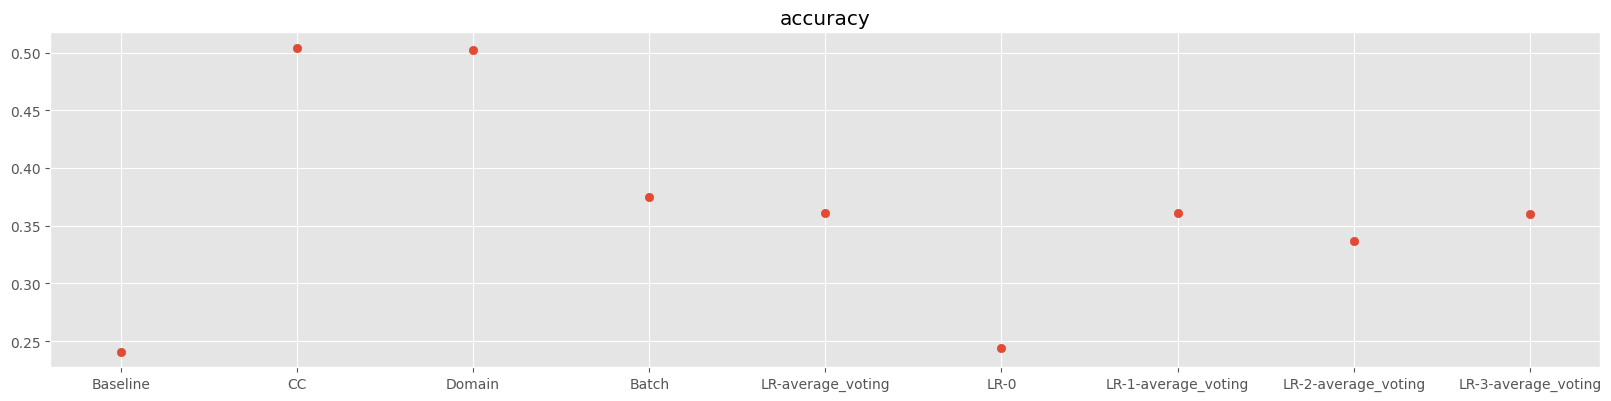

In [59]:
generate_plot(results_dicts, 'sst5', methods_to_compare, ['accuracy'])

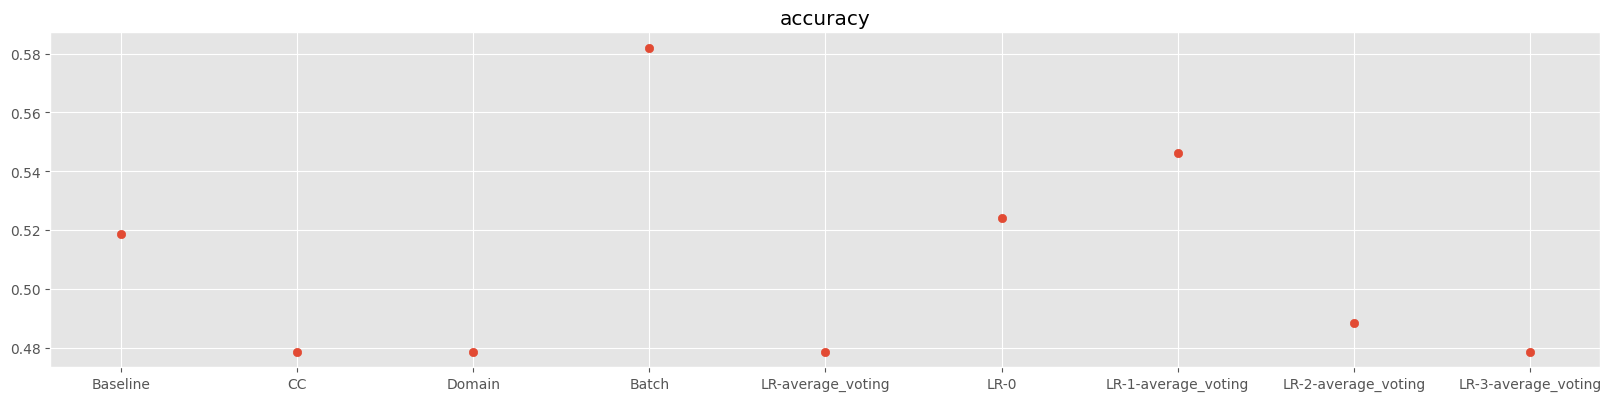

In [60]:
generate_plot(results_dicts, 'subjective', methods_to_compare, ['accuracy'])

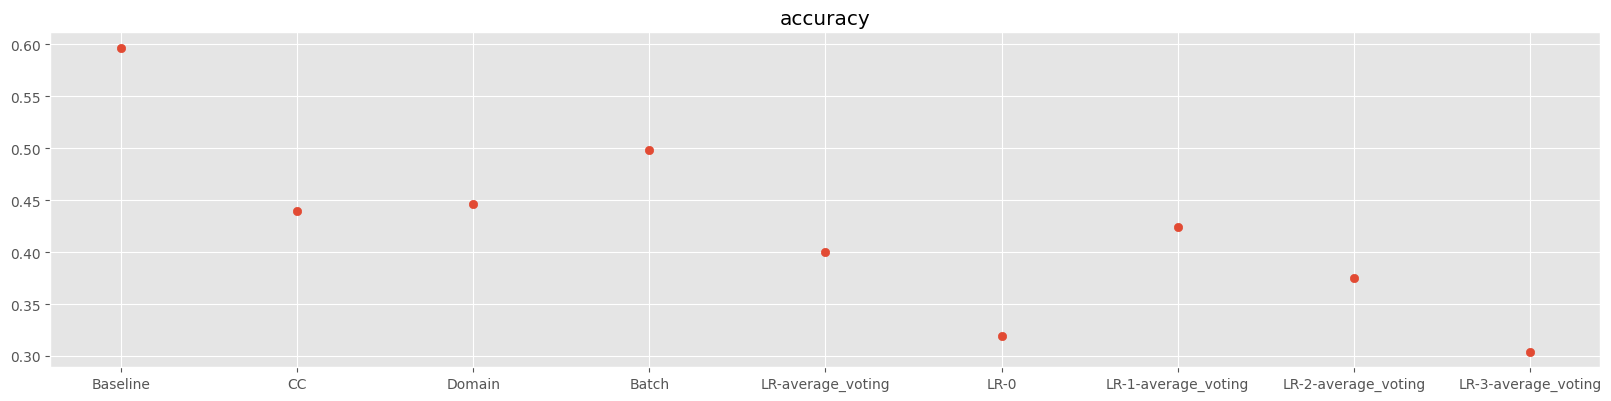

In [61]:
generate_plot(results_dicts, 'trec', methods_to_compare, ['accuracy'])

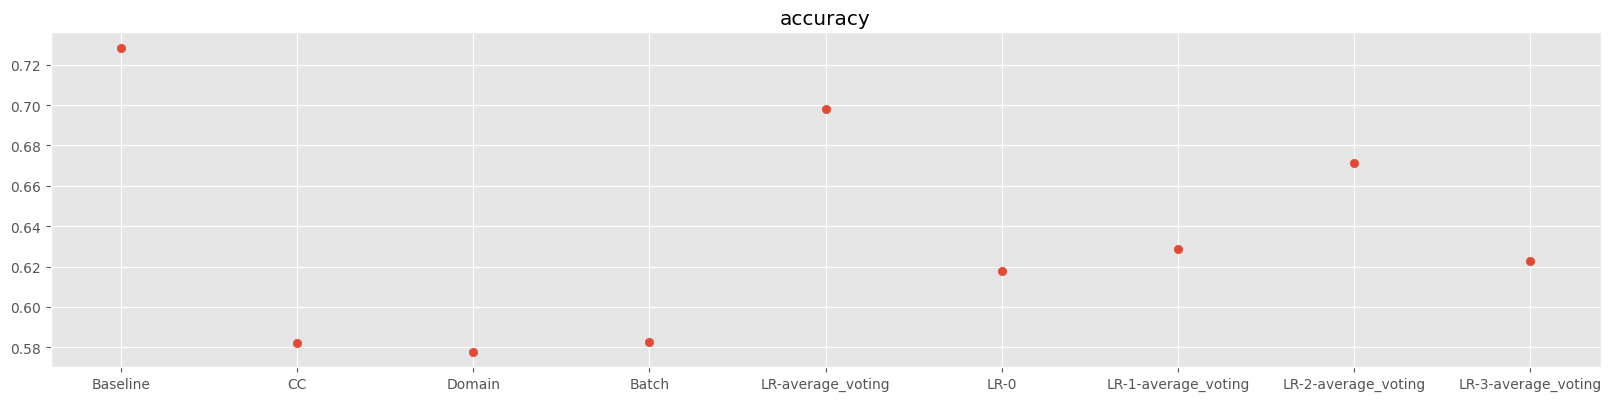

In [62]:
generate_plot(results_dicts, 'tweet_eval_emotion', methods_to_compare, ['accuracy'])

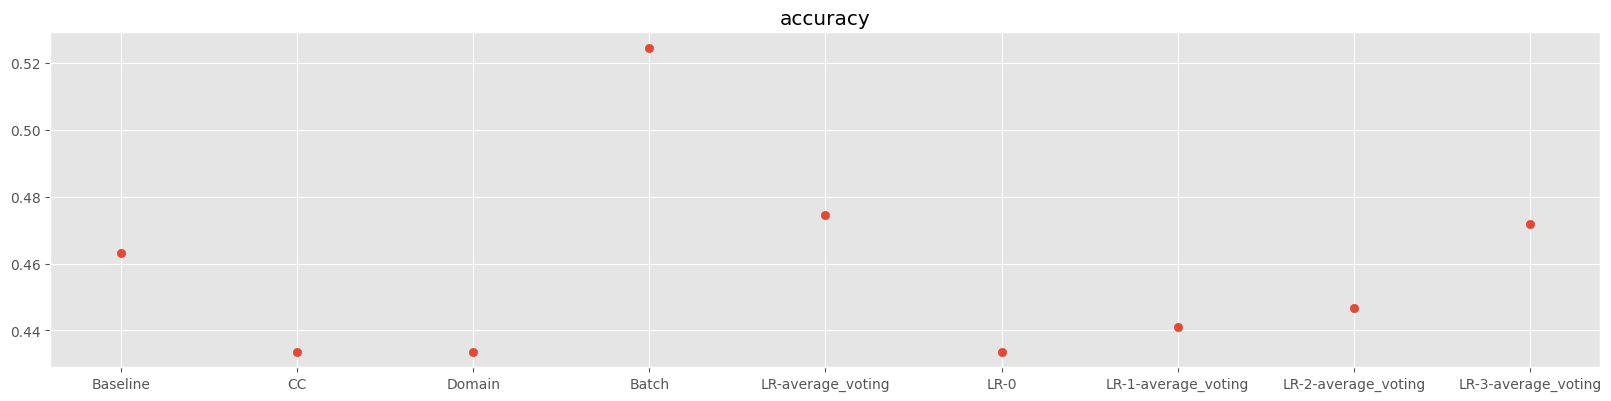

In [63]:
generate_plot(results_dicts, 'tweet_eval_hate', methods_to_compare, ['accuracy'])